# Lab 8: Inferential Modeling

## Name:

---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Exercise 1

The sowc_demographics dataset is from UNICEF's State of the World's Children 2019 Statistical Tables. The data is broken down by country and contains a variety of statistics from each country. Describe the distribution of the fertility_2018 variable. The fertility_2018 variable represents the number of live births per woman in 2018. A fertility level of 2.1 is called replacement level and represents a level at which the population would remain the same size. Roughly what percent of countries are at or above the replacement level?

---

Type your response here.

In [2]:
sowc_demographics = pd.read_csv("sowc_demographics.csv", na_values='NaN')

sowc_demographics

,Unnamed: 0,countries_and_areas,total_pop_2018,under18_pop_2018,under5_pop_2018,pop_growth_rate_2018,pop_growth_rate_2030,births_2018,fertility_2018,life_expectancy_1970,life_expectancy_2000,life_expectancy_2018,dependency_ratio_total,dependency_ratio_child,dependency_ratio_oldage,percent_urban_2018,pop_urban_growth_rate_2018,pop_urban_growth_rate_2030,migration_rate
0,1,Afghanistan,37172,18745.0,5601.0,3.2,2.1,1207.0,4.5,37.0,56.0,64.0,84.0,79.0,5.0,25,4.0,3.4,-1.7
1,2,Albania,2883,635.0,173.0,-0.5,-0.3,34.0,1.6,67.0,74.0,78.0,46.0,26.0,20.0,60,1.6,0.9,-4.9
2,3,Algeria,42228,14416.0,4951.0,1.7,1.5,1023.0,3.0,50.0,71.0,77.0,58.0,47.0,10.0,73,2.8,2.1,-0.2
3,4,Andorra,77,NaN,NaN,0.9,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,0.6,0.1,NaN
4,5,Angola,30810,16457.0,5553.0,3.5,3.1,1257.0,5.5,41.0,47.0,61.0,96.0,92.0,4.0,66,5.0,4.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,Venezuela (Bolivarian Republic of),28887,9527.0,2545.0,1.0,1.3,524.0,2.3,65.0,72.0,72.0,54.0,43.0,11.0,88,1.0,1.3,-22.3
198,199,Viet Nam,95546,26017.0,7831.0,1.0,0.7,1598.0,2.0,60.0,73.0,75.0,44.0,33.0,10.0,36,3.1,2.5,-0.8
199,200,Yemen,28499,13183.0,4084.0,2.7,2.0,868.0,3.8,37.0,61.0,66.0,74.0,69.0,5.0,37,4.6,3.6,-1.1
200,201,Zambia,17352,9033.0,2869.0,2.8,2.8,629.0,4.6,50.0,44.0,64.0,89.0,85.0,4.0,44,4.1,4.1,-0.5


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fertility_2018', ylabel='Count'>

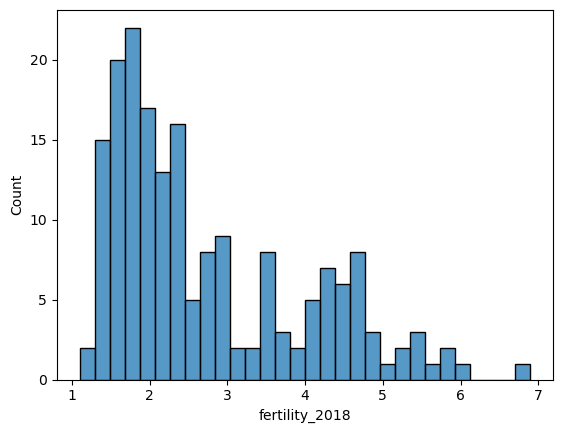

In [4]:
sns.histplot(data=sowc_demographics['fertility_2018'], bins=30)

# Exercise 2

Is there a relationship between life expectancy and fertility? Potentially life_expectancy_2018 is a good predictor of fertility_2018. If so, what is the relationship? Create a linear model and describe the relationship between the variables.

---

Type your response here.

<Axes: xlabel='life_expectancy_2018', ylabel='fertility_2018'>

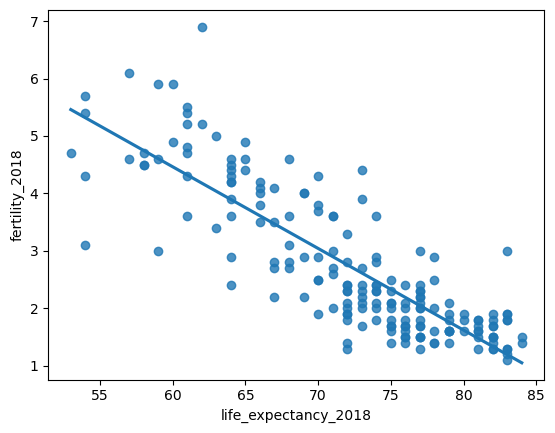

In [7]:
demo_lifefert = pd.DataFrame().assign(life_expectancy_2018=sowc_demographics['life_expectancy_2018'], fertility_2018=sowc_demographics['fertility_2018'])
demo_lifefert_clean = demo_lifefert.dropna(ignore_index=True)

sns.regplot(x='life_expectancy_2018', y='fertility_2018', data=demo_lifefert_clean, ci=None)

In [9]:
model_lr = LinearRegression().fit(demo_lifefert_clean[['life_expectancy_2018']], demo_lifefert_clean.fertility_2018)

print(f"R-squared value: {model_lr.score(demo_lifefert_clean[['life_expectancy_2018']], demo_lifefert_clean.fertility_2018)}")
print(f"Slope: {model_lr.coef_[0]}")
print(f"y-intercept: {model_lr.intercept_}")

print(f"Regression Line Equation: Y = {model_lr.coef_[0]:.2f} * X + {model_lr.intercept_:.2f}")

R-squared value: 0.7093190632584991
Slope: -0.14211156914002285
y-intercept: 12.990987164019042
Regression Line Equation: Y = -0.14 * X + 12.99


# Exercise 3

Create a plot of 50 randomized regressions to compare with the model we found above.

---

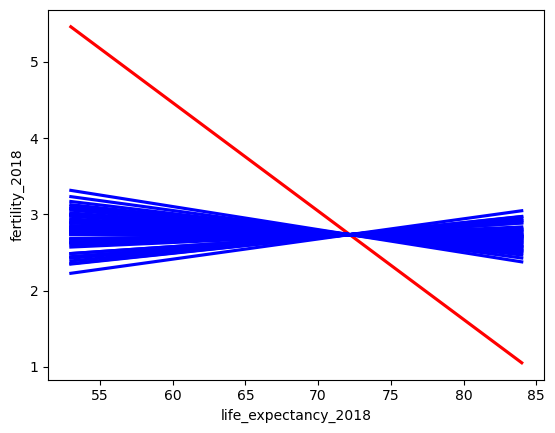

In [14]:
sns.regplot(x='life_expectancy_2018', y='fertility_2018', data=demo_lifefert_clean, ci=None, scatter=False, color='red')

for x in range(50):
    sim_regression = pd.DataFrame().assign(fertility_2018=demo_lifefert_clean['fertility_2018'].sample(frac=1, ignore_index=True), life_expectancy_2018=demo_lifefert_clean['life_expectancy_2018'])
    sns.regplot(x='life_expectancy_2018', y='fertility_2018', data=sim_regression, ci=None, scatter=False, color='blue')

# Exercise 4

Is there a linear relationship between life expectancy and fertility? Conduct a hypothesis test to answer this question. Be sure to properly interpret your results including a confidence interval.

---

Type your response here.

C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


The p-value for a two-tailed test from the simulated data is 0.0


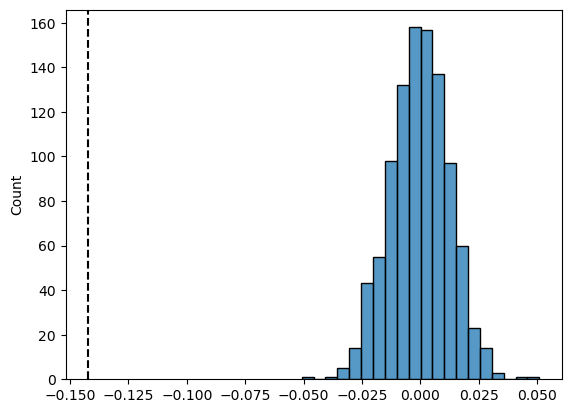

In [17]:
sim_slopes = []

for x in range(1000):
    sim_regression = pd.DataFrame().assign(fertility_2018=demo_lifefert_clean['fertility_2018'].sample(frac=1, ignore_index=True), life_expectancy_2018=demo_lifefert_clean['life_expectancy_2018'])
    sim_model_lr = LinearRegression().fit(sim_regression[['life_expectancy_2018']], sim_regression.fertility_2018)
    sim_slopes.append(sim_model_lr.coef_[0])

ax = sns.histplot(data=sim_slopes, bins=20)
ax.axvline(x = model_lr.coef_[0], ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

print("The p-value for a two-tailed test from the simulated data is", 2*len([i for i in sim_slopes if i < model_lr.coef_[0]]) / len(sim_slopes))

C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


The 95% confidence interval from bootstrapping is: [ -0.1552091932542887 , -0.1289482102134949 ]


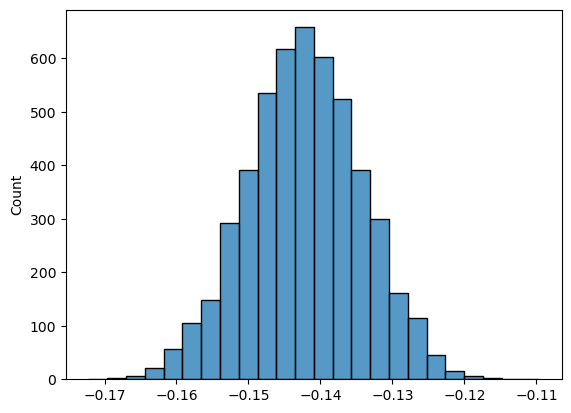

In [22]:
bootstrap_slopes = []

for x in range(5000):
    sim_regression = demo_lifefert_clean.sample(frac=1, ignore_index=True, replace=True)
    sim_model_lr = LinearRegression().fit(sim_regression[['life_expectancy_2018']], sim_regression.fertility_2018)
    bootstrap_slopes.append(sim_model_lr.coef_[0])

bootstrap_slopes.sort()
ax = sns.histplot(data=bootstrap_slopes, bins=24)
print("The 95% confidence interval from bootstrapping is: [", bootstrap_slopes[int(0.05*len(bootstrap_slopes))], ",", bootstrap_slopes[int(0.95*len(bootstrap_slopes))], "]")

# Exercise 5

Create a linear regression model to predict fertility using the multiple predictors: life_expectancy_2018, migration_rate, percent_urban_2018, births_2018, and dependency_ratio_total. Do you think this model predicts fertility rates better than the model above? Why or why not?

---

Type your response below.

In [50]:
demo_mult = sowc_demographics.filter(['fertility_2018', 'life_expectancy_2018', 'migration_rate', 'percent_urban_2018', 'births_2018', 'dependency_ratio_total'])
demo_mult_clean = demo_mult.dropna(ignore_index=True)

mult_model_lr = LinearRegression()
#mult_model_lr.fit(demo_mult_clean[['life_expectancy_2018', 'migration_rate', 'percent_urban_2018', 'births_2018', 'dependency_ratio_total']], demo_mult_clean['fertility_2018'])
X=demo_mult_clean.drop(columns=['fertility_2018'])
mult_model_lr.fit(X, demo_mult_clean['fertility_2018'])

for i, x in enumerate(list(X)):
    print(f"slope for {x} is {mult_model_lr.coef_[i]:.4f}")

print(f"R squared value for model is {mult_model_lr.score(X, demo_mult_clean['fertility_2018'])}")

slope for life_expectancy_2018 is -0.0718
slope for migration_rate is 0.0296
slope for percent_urban_2018 is 0.0004
slope for births_2018 is -0.0000
slope for dependency_ratio_total is 0.0483
R squared value for model is 0.9022297923144124


# Exercise 6

Using cross-validation, create prediction error plots and compute the cross-validation sum of squared errors for both models. Which model seems to be the better predicter for fertility rates?

---

Type your response here.

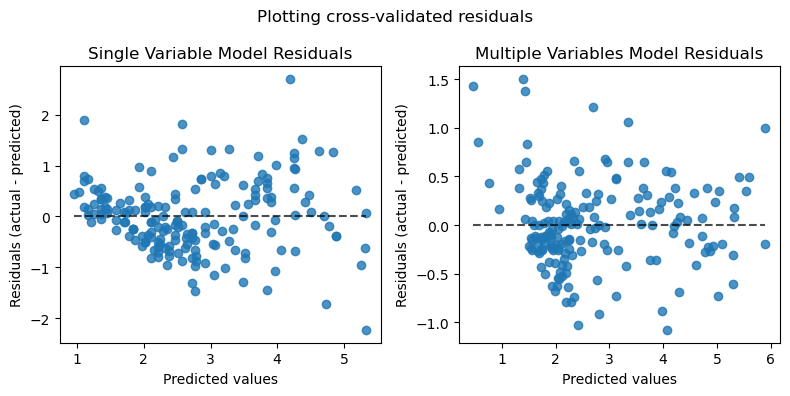

In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import PredictionErrorDisplay

y_pred_single = cross_val_predict(model_lr, demo_lifefert_clean[['life_expectancy_2018']], demo_lifefert_clean['fertility_2018'], cv=4)
y_pred_mult = cross_val_predict(mult_model_lr, X, demo_mult_clean['fertility_2018'], cv=4)

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(y_true=demo_lifefert_clean['fertility_2018'], y_pred=y_pred_single, ax=axs[0])
axs[0].set_title("Single Variable Model Residuals")
PredictionErrorDisplay.from_predictions(y_true=demo_mult_clean['fertility_2018'], y_pred=y_pred_mult, ax=axs[1])
axs[1].set_title("Multiple Variables Model Residuals")
fig.suptitle("Plotting cross-validated residuals")
plt.tight_layout()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error

sse_single = len(demo_lifefert_clean['fertility_2018'])*mean_squared_error(demo_lifefert_clean['fertility_2018'], y_pred_single)
sse_mult = len(demo_mult_clean['fertility_2018'])*mean_squared_error(demo_mult_clean['fertility_2018'], y_pred_mult)

print("The cross-validation sum of squared error for the single predictor model is", sse_single)
print("The cross-validation sum of squared error for the multiple predictor model is", sse_mult)

The cross-validation sum of squared error for the single predictor model is 89.35365607174214
The cross-validation sum of squared error for the multiple predictor model is 35.2483926804111
